In [28]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

%matplotlib inline
df=pd.read_csv('Dummy Data HSS.csv')

In [14]:
df = df.drop('Influencer', axis=1)
df = df.dropna()
test_df = df.sample(n=100)
df = df.iloc[:150]
df.head()

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [15]:
columns_to_normalize = df[['TV','Radio','Social Media']]
columns_to_normalize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 156
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            150 non-null    float64
 1   Radio         150 non-null    float64
 2   Social Media  150 non-null    float64
dtypes: float64(3)
memory usage: 4.7 KB


In [16]:
columns_to_normalize_test = test_df[['TV','Radio','Social Media']]
columns_to_normalize_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 3057 to 3836
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            100 non-null    float64
 1   Radio         100 non-null    float64
 2   Social Media  100 non-null    float64
dtypes: float64(3)
memory usage: 3.1 KB


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[columns_to_normalize.columns] = scaler.fit_transform(df[columns_to_normalize.columns])


In [18]:
test_df[columns_to_normalize_test.columns] = scaler.fit_transform(test_df[columns_to_normalize_test.columns])

test_df

,TV,Radio,Social Media,Sales
3057,0.844444,0.872310,0.570764,305.798332
3252,0.477778,0.443853,0.477757,188.212386
4334,0.533333,0.373270,0.157098,202.886881
3870,0.600000,0.588918,0.825545,226.727492
4316,0.533333,0.483308,0.841825,207.635847
...,...,...,...,...
1719,0.800000,0.723391,0.258134,293.580972
3762,0.522222,0.599789,0.623450,204.236881
2489,0.622222,0.723821,0.548686,232.265298
2402,0.411111,0.471325,1.000000,167.739801


In [19]:
np_data=df.values
np_test= test_df.values


In [20]:
X = np_data[:, :3]
X_test = np_test[:, :3]

In [21]:
y = np_data[:, 3]  
y_test = np_test[:, 3]  
#y

In [22]:
X_test

array([[0.84444444, 0.87230986, 0.57076425],
       [0.47777778, 0.44385336, 0.47775707],
       [0.53333333, 0.37326989, 0.15709771],
       [0.6       , 0.58891845, 0.82554517],
       [0.53333333, 0.48330839, 0.84182503],
       [0.3       , 0.05960915, 0.49429886],
       [0.81111111, 0.78424267, 0.60052455],
       [0.62222222, 0.68630256, 0.42791807],
       [0.16666667, 0.45539347, 0.29453981],
       [0.85555556, 0.74960665, 0.49446785],
       [0.22222222, 0.57855447, 0.50082089],
       [0.65555556, 0.51097111, 0.02459583],
       [0.55555556, 0.41026274, 0.31328176],
       [0.9       , 0.61228728, 0.70713647],
       [0.58888889, 0.59890639, 0.63159735],
       [0.96666667, 0.84014822, 0.27549254],
       [0.14444444, 0.26828105, 0.05903641],
       [0.17777778, 0.10538945, 0.1928044 ],
       [0.33333333, 0.27125894, 0.34776573],
       [0.73333333, 0.50972414, 0.23721787],
       [0.35555556, 0.32765457, 0.54046103],
       [0.23333333, 0.27698684, 0.07817191],
       [0.

In [23]:
def cost_vs_iteration(cost_list):
    plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', linestyle='-')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function over Iterations')
    plt.grid(True)
    plt.show()
        
def cost_vs_parameter(theta_1,cost_list):
    plt.figure(figsize=(8, 6))
    plt.plot(theta_1, cost_list, marker='o', linestyle='-')
    plt.title('Cost vs. Theta One')
    plt.xlabel('Theta One')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()

In [24]:
def get_theta(theta_all):
    result_array = np.concatenate(theta_all, axis=1).T

    #print(result_array)
   # print("Shape:", result_array.shape)
    return result_array

In [25]:
import numpy as np

class Second_order_optimizer:
    def __init__(self, alpha=0.01, iterations=100, cost_check=0.001, grad_check=0.001):
        self.alpha = alpha
        self.iterations = iterations
        self.cost_check = cost_check
        self.grad_check = grad_check
        self.theta_2 = None
        self.theta_1 = None
        self.cost_list = []
        self.theta_all = []

    def fit(self, X, y_actual):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        y_actual = y_actual.reshape(y_actual.shape[0], 1)
        self.theta_2 = np.full((X.shape[1], 1), 0.1)
        self.theta_1 = np.full((X.shape[1], 1), 0.2)
        m = y_actual.shape[0]

        j = np.identity(X.shape[1])
        b_1 = np.identity(X.shape[1])
        self.theta_all.insert(0,self.theta_1.copy())
        for i in range(self.iterations):
            h_x = np.dot(X, self.theta_1)
            error = h_x - y_actual
            cost = np.mean(error ** 2) / 2
            self.cost_list.append(cost)

            gradient1 = (1 / m) * X.T.dot(np.dot(X, self.theta_1) - y_actual)
            gradient2 = (1 / m) * X.T.dot(np.dot(X, self.theta_2) - y_actual)
            delta_X = self.theta_2 - self.theta_1
            y = gradient2 - gradient1

            first_brackets = j - np.divide(np.dot(delta_X, y.T), np.dot(y.T, delta_X))
            first_Dot_B = np.dot(first_brackets, b_1)
            second_brackets = j - np.divide(np.dot(y, delta_X.T), np.dot(y.T, delta_X))
            third = np.divide(np.dot(delta_X, delta_X.T), np.dot(y.T, delta_X))
            b_1 = np.dot(first_Dot_B, second_brackets) + third

            if np.linalg.norm(gradient1) <= self.grad_check:
                print('Reached small gradient')
                break
            if i != 0 and abs(self.cost_list[-1] - self.cost_list[-2]) < self.cost_check:
                print('Reached small cost')
                break

            self.theta_2 = self.theta_1.copy()
            self.theta_1 -= self.alpha * np.dot(b_1, gradient1)
            self.theta_all.append(self.theta_1.copy())

        return self.theta_1, i, self.cost_list, self.theta_all

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return np.dot(X, self.theta_1)




In [29]:
model = Second_order_optimizer(alpha=1, iterations=100, cost_check=0.001, grad_check=0.001)

# Fit the model to the data
theta, iterations, cost_list, theta_all = model.fit(X, y)

# Make predictions
predictions = model.predict(X)
r2_score(y,predictions)

Reached small gradient


0.999228131628416

In [30]:
thetaa=get_theta(model.theta_all) 
thetaa

array([[ 2.00000000e-01,  2.00000000e-01,  2.00000000e-01,
         2.00000000e-01],
       [ 8.26861412e+01,  9.90589488e+01,  9.46770417e+01,
         9.08144130e+01],
       [ 7.62956882e+01,  1.07446507e+02,  9.88562514e+01,
         9.13154026e+01],
       [ 1.88680987e+01,  1.80212654e+02,  1.32206685e+02,
         9.05380607e+01],
       [ 1.84001009e+01,  1.83204053e+02,  1.31786720e+02,
         8.75207192e+01],
       [ 2.34001126e+01,  2.58396654e+02,  1.08030450e+02,
        -8.99122469e+00],
       [ 3.05311225e+01,  2.64435619e+02,  1.00445762e+02,
        -2.43428372e+01],
       [ 3.38023274e+01,  2.63842350e+02,  9.72246732e+01,
        -2.65740295e+01],
       [ 3.50069211e+01,  2.63836244e+02,  9.50738724e+01,
        -2.65602139e+01],
       [ 3.84499627e+01,  2.66258028e+02,  8.46388490e+01,
        -2.50854728e+01],
       [ 4.16424431e+01,  2.74036230e+02,  6.56543990e+01,
        -2.09624545e+01],
       [ 4.33468925e+01,  2.92560947e+02,  3.14106772e+01,
      

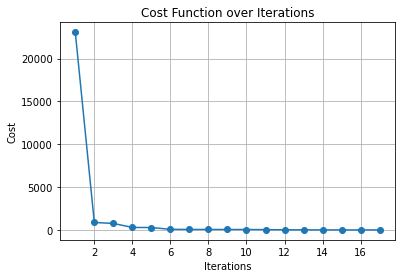

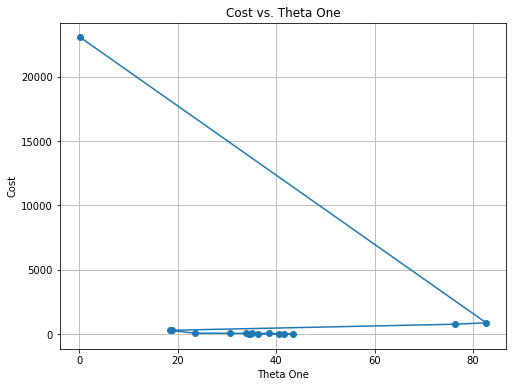

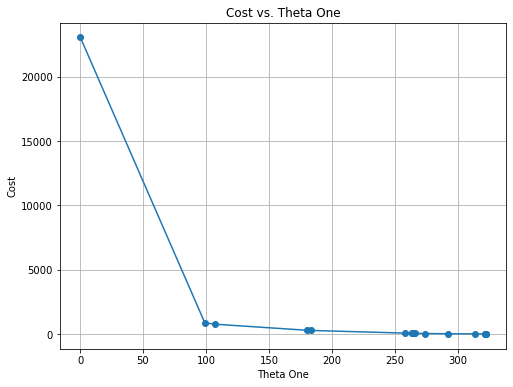

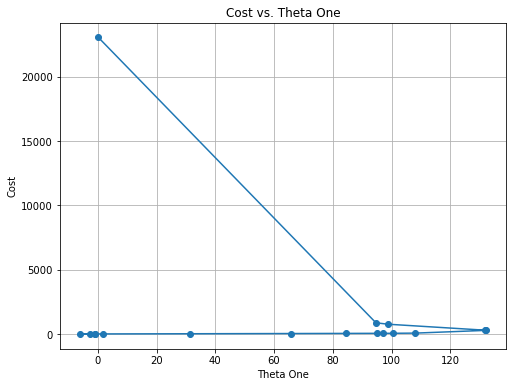

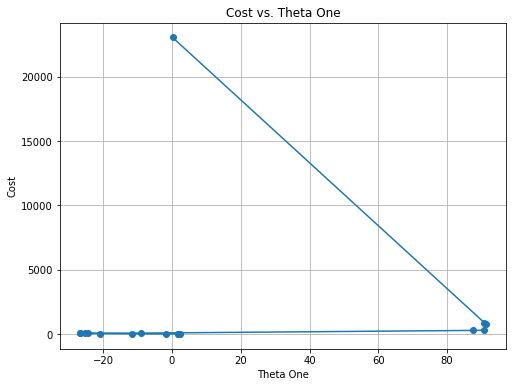

In [32]:
thetaa=get_theta(model.theta_all)
# = array[:, 0]
cost_vs_iteration(model.cost_list)
cost_vs_parameter(thetaa[:, 0],model.cost_list)  
cost_vs_parameter(thetaa[:, 1],model.cost_list)  
cost_vs_parameter(thetaa[:, 2],model.cost_list)  
cost_vs_parameter(thetaa[:, 3],model.cost_list)